<a href="https://colab.research.google.com/github/MarissaNorlund/Norlund-2025/blob/main/Appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jan. 24, 2025**
---

* I used *pip install* and installed the program Prose from **[lgrcia](https://github.com/lgrcia/prose)** on GitHub, and started working on the "Quickstart" code that was in their book.

# Quickstart and Core Objects
---
* "***Prose*** contains the structure to build modular image processing pipelines with three key
objects: **Image** going
through a list of **Block** assembled into a **Sequence**."
  * An **Image** contains the image data and metadata.
  * A **Block** is a single unit of processing acting on the **Image** object, which can read and write its attributes, or modify.
  * A **Sequence** is a succession of **Block**.

In [1]:
pip install 'prose @ git+https://github.com/lgrcia/prose'

  Cloning https://github.com/lgrcia/prose to /tmp/pip-install-0ew2z4nk/prose_9c6113c470d0484cba99adb268ea3867
  Running command git clone --filter=blob:none --quiet https://github.com/lgrcia/prose /tmp/pip-install-0ew2z4nk/prose_9c6113c470d0484cba99adb268ea3867
  Resolved https://github.com/lgrcia/prose to commit 020b6d4d57063a0757a4a944b930adf57c8cf148
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 83.9

Telescope 'callisto' saved
Telescope 'io' saved
Telescope 'ganymede' saved
Telescope 'europa' saved
Telescope 'artemis' saved
Telescope 'trappist-south' saved
Telescope 'trappist-north' saved
Telescope 'saint-ex' saved
Telescope 'liverpool' saved
Telescope 'spirit' saved
A config file as been created in /root/.prose
downloading ballet model (~30Mb)


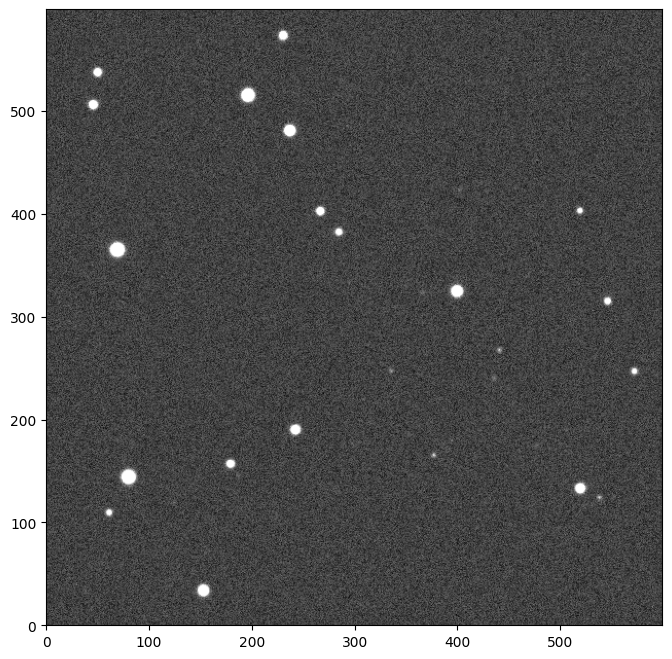

In [2]:
# Loading in an example image.

from prose import Sequence, blocks, example_image
import matplotlib.pyplot as plt

# getting the example image
image = example_image()
image.show()

  0%|          | 0/1 [00:00<?, ?images/s]

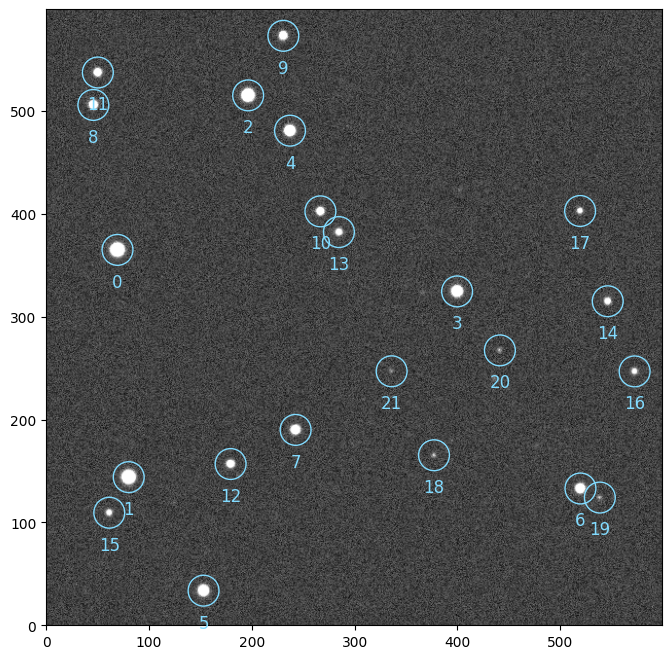

In [3]:
# Building a Sequence containing single processing units
# called Block that will process our image.

sequence = Sequence(
    [
        blocks.PointSourceDetection(),  # stars detection
        blocks.Cutouts(21),             # cutouts extraction
        blocks.MedianEPSF(),            # PSF building
        blocks.Moffat2D(),              # PSF modeling
    ]
)

sequence.run([image])

# plotting the detected stars
image.show()

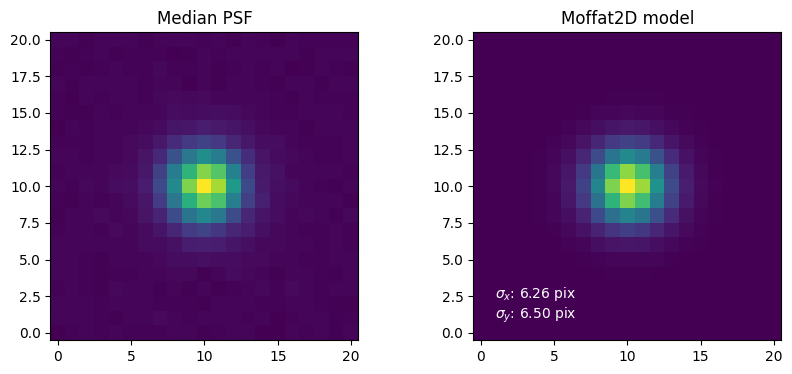

In [4]:
# Plotting the results of the PSF building and modeling from the Image attributes.

plt.figure(None, (10, 4))

# PSF building
plt.subplot(1, 2, 1, title="Median PSF")
plt.imshow(image.epsf.data, origin="lower")

# PSF modeling
params = image.epsf.params
model = image.epsf.model

plt.subplot(1, 2, 2, title=f"Moffat2D model")
plt.imshow(model(params), origin="lower")
_ = plt.text(
    1,
    1,
    f"$\sigma_x$: {params['sigma_x']:.2f} pix\n$\sigma_y$: {params['sigma_y']:.2f} pix",
    c="w",
)

In [5]:
from prose import Image, Block, Sequence
import numpy as np

np.random.seed(42)
images = [Image(data=np.random.rand(10, 10)) for i in range(5)]

In [6]:
class HelloWorld(Block):
    def run(self, image):
        image.mean = np.mean(image.data)
        print(f"Hello world (mean: {image.mean:.2f})")

In [7]:
sequence = Sequence(
    [
        HelloWorld(),
    ]
)

sequence.run(images)

  0%|          | 0/5 [00:00<?, ?images/s]

Hello world (mean: 0.47)
Hello world (mean: 0.50)
Hello world (mean: 0.52)
Hello world (mean: 0.49)
Hello world (mean: 0.52)


# Fits Manager
---

* The **Fits Manager** assists in the process of sorting fits image folders, and makes the process of finding needed images go faster.

* In cell **four** the keywords of all images have been parsed and associated with different telescopes.
  * The advantage is that specific keywords from specific telescopes are recognized and standardized to common namings.
  * This is useful to define telescope agnostic pipelines.

## Telescope Specific Keywords
---

* The information retained by **FitsManager** was taken from images headers.
  * To know which keywords to use, we had to register telescopes A and B with a dictionary.
  * Whenever their names appear in a fits header, their dictionary is loaded to read their header keywords.

* Since we just specified the telescope names all the rest is default.
  * For example the filter is taken from the keyword **FILTER** and the image type from **IMAGETYP**, knowing that **IMAGETYP=light** is a light (a.k.a science) frame.
  * These keywords can be set in more details when registering the telescope.

* For more details, check the **Telescope** object:

      from shutil import rmtree

      rmtree(destination)



In [9]:
from prose import FitsManager, Telescope
from prose import simulations

In [10]:
# Example of how the Fits Manager is used.
# Here we are generating a set of fake data from telescope 'A' and 'B'.

_ = Telescope(name="A", save=True)
_ = Telescope(name="B", save=True)

Telescope 'a' saved
Telescope 'b' saved


In [11]:
# Images will be located in a single folder, featuring different sizes,
# filters and associated calibration files, with no way to distinguish them from their file names.

destination = "./fake_observations"
simulations.disorganised_folder(destination)

In [12]:
# This instates a FitsManager object that goes into a disorganised folder.

fm = FitsManager(destination)
fm

Parsing FITS:   0%|          | 0/28 [00:00<?, ?it/s]

,date,telescope,filter,type,target,width,height,files
id,,,,,,,,
3,2025-01-24,B,b,light,prose,10,20,5
2,2025-01-24,Spirit,,dark,prose,10,10,2
7,2025-01-24,Spirit,a,light,prose,10,10,5
1,2025-01-24,Spirit,ab,light,prose,10,10,5
5,2025-01-24,Spirit,b,flat,prose,10,10,2
6,2025-01-24,Spirit,b,light,prose,10,10,5
8,2025-01-24,Spirit,c,dark,prose,10,10,2
4,2025-01-24,Spirit,c,flat,prose,10,10,2


In [13]:
# Keeps the files from an observation using its id.
# Flats with the right filter have been kept, as well as darks.

files = fm.observation_files(1)

/usr/local/lib/python3.11/dist-packages/prose/io/fitsmanager.py:537: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, axis=0).set_index(["id"])


,date,telescope,filter,type,target,width,height,exposure,files
id,,,,,,,,,
1,2025-01-24,Spirit,ab,light,prose,10,10,1.0,5
2,2025-01-24,Spirit,,dark,prose,10,10,1.0,2
8,2025-01-24,Spirit,c,dark,prose,10,10,8.0,2


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['exposure'].plot(kind='hist', bins=20, title='exposure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('filter').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('files').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='id', y='exposure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<string>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('filter')):
  _plot_series(series, series_name, i)
  fig.legend(title='filter', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('files')):
  _plot_series(series, series_name, i)
  fig.legend(title='files', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

<string>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('filter')):
  _plot_series(series, series_name, i)
  fig.legend(title='filter', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['exposure'].plot(kind='line', figsize=(8, 4), title='exposure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in _df_12.groupby('filter')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('filter')
_ = plt.ylabel('type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['files'].value_counts()
    for x_label, grp in _df_13.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('files')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['filter'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='id', y='filter', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='id', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['files'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='id', y='files', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['filter'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='exposure', y='filter', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)